In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import notebook

In [2]:
targets_file = '/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/targets.npy'
targets = np.load(targets_file, allow_pickle=True)

In [3]:
durations_ = []
behaviors_ = []
for i in notebook.tqdm(range(len(targets))):
    try:
        durations_.append(np.diff(np.where(np.diff(targets[i]) != 0)[0]))
        behaviors_.append(targets[i][np.where(np.diff(targets[i]) != 0)[0]][:-1])
    except:
        pass

  0%|          | 0/70 [00:00<?, ?it/s]

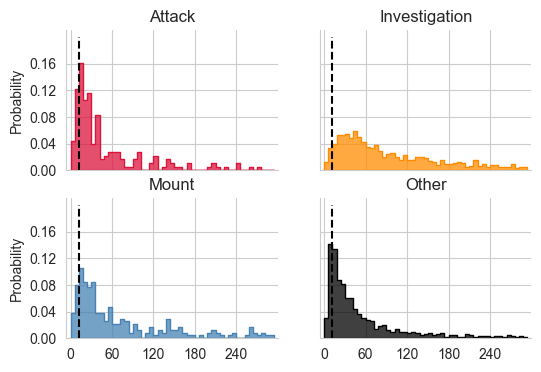

In [5]:
behavior_types = ['Attack', 'Investigation', 'Mount', 'Other']
cmap = ['crimson', 'darkorange', 'steelblue', 'k']
rows, cols = 2, 2
fig, ax = plt.subplots(rows, cols, figsize=(6, 4), sharey=True, sharex=True)
duration_per = []
b = 0
for row in range(rows):
    for col in range(cols):
        duration_per.append(np.hstack(([durations_[i][np.where(behaviors_[i] == b)[0]] for i in range(len(behaviors_))])))

        sns.histplot(data=duration_per[b],
                     stat='probability', color=cmap[b],
                     element='step',
                     bins=np.arange(0, 300, 6), ax=ax[row, col])

        ax[row, col].set_title(behavior_types[b])
        ax[row, col].set_xlim([-6, 300])
        ax[row, col].set_xticks(np.arange(0, 300, 60))
        ax[row, col].set_yticks(np.arange(0, 0.2, 0.04))
        ax[row, col].spines['right'].set_visible(False)
        ax[row, col].spines['top'].set_visible(False)
        ax[row, col].vlines(12, 0, 0.2, 'k', ls='--')
        b += 1

plt.show()